# 1.1

Construct a posterior distribution, using grid approximation.

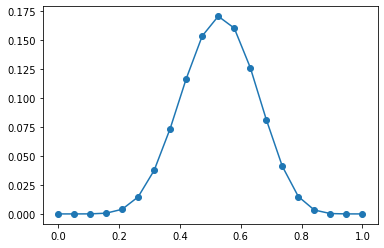

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

W = 8
N = 15

# Define grid
p_grid = np.linspace(start=0, stop=1, num=20)

# Construct a flat prior
prior = np.ones(20)

# Compute likelihood at each value in grid
likelihood = binom.pmf(k=W, n=N, p=p_grid)

unstd_posterior = likelihood * prior

# standardize the posterior
posterior = unstd_posterior / np.sum(unstd_posterior)

plt.plot(p_grid, posterior, marker="o")
plt.show()

posterior_1 = posterior

# 1.2 #

Start over in 1, but now use a prior that is zero below p=0.5 and constant above p=0.5.

What difference does the better prior make?

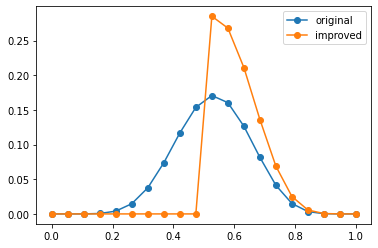

In [14]:
# Define grid
p_grid = np.linspace(start=0, stop=1, num=20)

# Construct a flat prior
prior = np.concatenate((np.zeros(10), np.ones(10)))

# Compute likelihood at each value in grid
likelihood = binom.pmf(k=W, n=N, p=p_grid)

unstd_posterior = likelihood * prior

# standardize the posterior
posterior = unstd_posterior / np.sum(unstd_posterior)

plt.plot(p_grid, posterior_1, marker="o", label="original")
plt.plot(p_grid, posterior, marker="o", label="improved")
plt.legend()
plt.show()

The better prior results in a higher likelihood of the true answer (p=0.7).

# 1.3 #

How many times do you have to toss the globe to get a 99% percentile interval of _p_ to be only 0.05 wide?

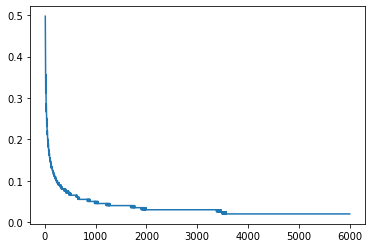

In [50]:

# For a given true p, toss the globe until the interval converges
# Repeat this procedure, tallying up how long it takes each time

def width_of_posterior(tosses):
    
    N = tosses
    W = np.floor(N*.1)
    
    # Define grid
    p_grid = np.linspace(start=0, stop=1, num=200)

    # Construct a flat prior
    prior = np.ones(200)

    # Compute likelihood at each value in grid
    likelihood = binom.pmf(k=W, n=N, p=p_grid)

    unstd_posterior = likelihood * prior

    # standardize the posterior
    posterior = unstd_posterior / np.sum(unstd_posterior)

#     plt.plot(p_grid, posterior, marker="o")
#     plt.show()

    def percentile(p, grid):
        a = np.argmax(np.cumsum(p) > 0.005)
        b = np.argmax(np.cumsum(p) > 0.995)    
        return p_grid[b] - p_grid[a]

    return percentile(posterior, p_grid)

ts = np.arange(start=10, stop=6000)
widths = [width_of_posterior(t) for t in ts]

plt.plot(ts, widths)
plt.show()